In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
os.getcwd()

'C:\\Users\\baari\\Documents\\uni\\y3\\project\\final_project\\hard-drive-predictive-maintenance'

In [3]:
ls

 Volume in drive C is OS
 Volume Serial Number is 9206-39C8

 Directory of C:\Users\baari\Documents\uni\y3\project\final_project\hard-drive-predictive-maintenance

07/02/2024  13:16    <DIR>          .
01/02/2024  21:38    <DIR>          ..
01/02/2024  21:36    <DIR>          .idea
05/02/2024  13:31    <DIR>          .ipynb_checkpoints
07/02/2024  13:16           220,570 analysing_and_processing_data.ipynb
29/01/2024  12:43             4,407 creating_dataframe.ipynb
07/02/2024  10:19    <DIR>          data
07/02/2024  13:16           217,463 decision_tree_and_random_forest_modelling.ipynb
05/02/2024  13:20               168 README.md
               4 File(s)        442,608 bytes
               5 Dir(s)  300,703,285,248 bytes free


In [4]:
ls data

 Volume in drive C is OS
 Volume Serial Number is 9206-39C8

 Directory of C:\Users\baari\Documents\uni\y3\project\final_project\hard-drive-predictive-maintenance\data

07/02/2024  10:19    <DIR>          .
07/02/2024  13:16    <DIR>          ..
07/02/2024  11:20     1,999,438,062 cleaned_and_processed_q1_data.csv
20/01/2024  22:43       567,789,964 data_Q1_2019.zip
24/01/2024  22:11       574,522,473 data_Q2_2019.zip
24/01/2024  22:11       600,893,581 data_Q3_2019.zip
22/01/2024  11:38       645,485,182 data_Q4_2019.zip
29/01/2024  10:21     3,773,635,954 Q1_2019.csv
29/01/2024  11:18     3,859,564,203 Q2_2019.csv
29/01/2024  12:04     4,044,583,480 Q3_2019.csv
29/01/2024  12:38     4,329,796,494 Q4_2019.csv
               9 File(s) 20,395,709,393 bytes
               2 Dir(s)  300,703,281,152 bytes free


In [29]:
df = pd.read_csv('data/cleaned_and_processed_q1_data.csv')

In [30]:
df

,date,serial_number,model,capacity_bytes,failure,smart_1_normalized,smart_1_raw,smart_3_normalized,smart_3_raw,smart_4_normalized,...,smart_193_normalized,smart_193_raw,smart_194_normalized,smart_194_raw,smart_197_normalized,smart_197_raw,smart_198_normalized,smart_198_raw,smart_199_normalized,smart_199_raw
0,2019-01-01,Z305B2QN,ST4000DM000,4000787030016,0,111.0,35673128.0,91.0,0.0,100.0,...,83.0,34169.0,20.0,20.0,100.0,0.0,100.0,0.0,200.0,0.0
1,2019-01-01,ZJV0XJQ4,ST12000NM0007,12000138625024,0,83.0,187116872.0,98.0,0.0,100.0,...,99.0,2145.0,28.0,28.0,100.0,0.0,100.0,0.0,200.0,0.0
2,2019-01-01,ZJV0XJQ3,ST12000NM0007,12000138625024,0,73.0,19599104.0,99.0,0.0,100.0,...,100.0,363.0,34.0,34.0,100.0,0.0,100.0,0.0,200.0,0.0
3,2019-01-01,ZJV0XJQ0,ST12000NM0007,12000138625024,0,81.0,136943696.0,93.0,0.0,100.0,...,100.0,687.0,22.0,22.0,100.0,0.0,100.0,0.0,200.0,0.0
4,2019-01-01,PL1331LAHG1S4H,HGST HMS5C4040ALE640,4000787030016,0,100.0,0.0,100.0,436.0,100.0,...,100.0,183.0,193.0,31.0,100.0,0.0,100.0,0.0,200.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9522889,2019-03-31,PL1331LAHD1AWH,HGST HMS5C4040BLE640,4000787030016,0,100.0,0.0,100.0,0.0,100.0,...,100.0,3.0,250.0,24.0,100.0,0.0,100.0,0.0,200.0,0.0
9522890,2019-03-31,ZA10MCEQ,ST8000DM002,8001563222016,0,72.0,15233376.0,94.0,0.0,100.0,...,100.0,152.0,25.0,25.0,100.0,0.0,100.0,0.0,200.0,0.0
9522891,2019-03-31,ZCH0CRTK,ST12000NM0007,12000138625024,0,81.0,122099464.0,97.0,0.0,100.0,...,100.0,677.0,26.0,26.0,100.0,0.0,100.0,0.0,200.0,0.0
9522892,2019-03-31,PL1331LAHD1T5H,HGST HMS5C4040BLE640,4000787030016,0,100.0,0.0,148.0,490.0,100.0,...,100.0,303.0,181.0,33.0,100.0,0.0,100.0,0.0,200.0,0.0


In [31]:
df['date'].dtype

dtype('O')

In [32]:
# Getting the serial number of the hard drives that have failed
failed_hdds = df.loc[df.failure==1]['serial_number']

In [33]:
len(failed_hdds)

418

In [34]:
# Filters the dataframe to include only rows where the serial number is in the failed hdds
df = df.loc[df['serial_number'].isin(failed_hdds)]

In [35]:
df.shape

(18588, 33)

In [36]:
df

,date,serial_number,model,capacity_bytes,failure,smart_1_normalized,smart_1_raw,smart_3_normalized,smart_3_raw,smart_4_normalized,...,smart_193_normalized,smart_193_raw,smart_194_normalized,smart_194_raw,smart_197_normalized,smart_197_raw,smart_198_normalized,smart_198_raw,smart_199_normalized,smart_199_raw
154,2019-01-01,Z304JN7J,ST4000DM000,4000787030016,0,119.0,208663312.0,92.0,0.0,100.0,...,97.0,7273.0,23.0,23.0,100.0,0.0,100.0,0.0,200.0,0.0
263,2019-01-01,ZCH05KWT,ST12000NM0007,12000138625024,0,79.0,155920208.0,98.0,0.0,100.0,...,100.0,633.0,40.0,40.0,100.0,88.0,100.0,88.0,200.0,0.0
385,2019-01-01,ZA16DSXV,ST8000NM0055,8001563222016,0,77.0,54823024.0,98.0,0.0,100.0,...,93.0,14936.0,29.0,29.0,100.0,0.0,100.0,0.0,200.0,0.0
465,2019-01-01,ZCH080T0,ST12000NM0007,12000138625024,0,84.0,235330528.0,94.0,0.0,100.0,...,100.0,1501.0,25.0,25.0,100.0,0.0,100.0,0.0,200.0,0.0
948,2019-01-01,ZA1890DY,ST8000NM0055,8001563222016,0,67.0,240427784.0,95.0,0.0,100.0,...,93.0,14353.0,38.0,38.0,100.0,0.0,100.0,0.0,200.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9274159,2019-03-29,ZCH0CZ0N,ST12000NM0007,12000138625024,1,78.0,70420808.0,99.0,0.0,100.0,...,100.0,417.0,27.0,27.0,100.0,0.0,100.0,0.0,200.0,0.0
9274964,2019-03-29,Z302SZLQ,ST4000DM000,4000787030016,1,114.0,80275488.0,93.0,0.0,100.0,...,93.0,15311.0,27.0,27.0,100.0,64.0,100.0,64.0,200.0,0.0
9285077,2019-03-29,S301NGZN,ST4000DM000,4000787030016,1,117.0,154872296.0,92.0,0.0,100.0,...,96.0,8232.0,21.0,21.0,100.0,16.0,100.0,16.0,200.0,0.0
9304668,2019-03-29,ZA17G86N,ST8000NM0055,8001563222016,1,79.0,75006424.0,96.0,0.0,100.0,...,98.0,5728.0,41.0,41.0,100.0,64.0,100.0,64.0,200.0,0.0


In [37]:
# Reset the index and drop the old index
df = df.reset_index(drop=True)

In [38]:
df

,date,serial_number,model,capacity_bytes,failure,smart_1_normalized,smart_1_raw,smart_3_normalized,smart_3_raw,smart_4_normalized,...,smart_193_normalized,smart_193_raw,smart_194_normalized,smart_194_raw,smart_197_normalized,smart_197_raw,smart_198_normalized,smart_198_raw,smart_199_normalized,smart_199_raw
0,2019-01-01,Z304JN7J,ST4000DM000,4000787030016,0,119.0,208663312.0,92.0,0.0,100.0,...,97.0,7273.0,23.0,23.0,100.0,0.0,100.0,0.0,200.0,0.0
1,2019-01-01,ZCH05KWT,ST12000NM0007,12000138625024,0,79.0,155920208.0,98.0,0.0,100.0,...,100.0,633.0,40.0,40.0,100.0,88.0,100.0,88.0,200.0,0.0
2,2019-01-01,ZA16DSXV,ST8000NM0055,8001563222016,0,77.0,54823024.0,98.0,0.0,100.0,...,93.0,14936.0,29.0,29.0,100.0,0.0,100.0,0.0,200.0,0.0
3,2019-01-01,ZCH080T0,ST12000NM0007,12000138625024,0,84.0,235330528.0,94.0,0.0,100.0,...,100.0,1501.0,25.0,25.0,100.0,0.0,100.0,0.0,200.0,0.0
4,2019-01-01,ZA1890DY,ST8000NM0055,8001563222016,0,67.0,240427784.0,95.0,0.0,100.0,...,93.0,14353.0,38.0,38.0,100.0,0.0,100.0,0.0,200.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18583,2019-03-29,ZCH0CZ0N,ST12000NM0007,12000138625024,1,78.0,70420808.0,99.0,0.0,100.0,...,100.0,417.0,27.0,27.0,100.0,0.0,100.0,0.0,200.0,0.0
18584,2019-03-29,Z302SZLQ,ST4000DM000,4000787030016,1,114.0,80275488.0,93.0,0.0,100.0,...,93.0,15311.0,27.0,27.0,100.0,64.0,100.0,64.0,200.0,0.0
18585,2019-03-29,S301NGZN,ST4000DM000,4000787030016,1,117.0,154872296.0,92.0,0.0,100.0,...,96.0,8232.0,21.0,21.0,100.0,16.0,100.0,16.0,200.0,0.0
18586,2019-03-29,ZA17G86N,ST8000NM0055,8001563222016,1,79.0,75006424.0,96.0,0.0,100.0,...,98.0,5728.0,41.0,41.0,100.0,64.0,100.0,64.0,200.0,0.0


In [39]:
df.to_csv('data/failed_hdds.csv', index=False)

In [40]:
df['date'].dtype

dtype('O')

# Finding the Remaining Useful Life (RUL)

In [41]:
# Calculates the maximum value (latest date) for each group (serial number)
df.loc[:, 'end_date'] = df.groupby('serial_number')['date'].transform('max')

In [42]:
df['end_date'].dtype

dtype('O')

In [45]:
df['date'] = pd.to_datetime(df['date'])
df['end_date'] = pd.to_datetime(df['end_date'])

In [46]:
df['date'].dtype

dtype('<M8[ns]')

In [47]:
df['end_date'].dtype

dtype('<M8[ns]')

In [48]:
df.loc[:, 'date_diff'] = df['end_date'] - df['date']
df.loc[:, 'date_diff'].describe()

count                         18588
mean     29 days 11:31:57.366042608
std      21 days 08:23:28.118660467
min                 0 days 00:00:00
25%                11 days 00:00:00
50%                26 days 00:00:00
75%                45 days 00:00:00
max                88 days 00:00:00
Name: date_diff, dtype: object

In [49]:
df['date_diff'].dtype

dtype('<m8[ns]')

In [50]:
df

,date,serial_number,model,capacity_bytes,failure,smart_1_normalized,smart_1_raw,smart_3_normalized,smart_3_raw,smart_4_normalized,...,smart_194_normalized,smart_194_raw,smart_197_normalized,smart_197_raw,smart_198_normalized,smart_198_raw,smart_199_normalized,smart_199_raw,end_date,date_diff
0,2019-01-01,Z304JN7J,ST4000DM000,4000787030016,0,119.0,208663312.0,92.0,0.0,100.0,...,23.0,23.0,100.0,0.0,100.0,0.0,200.0,0.0,2019-01-27,26 days
1,2019-01-01,ZCH05KWT,ST12000NM0007,12000138625024,0,79.0,155920208.0,98.0,0.0,100.0,...,40.0,40.0,100.0,88.0,100.0,88.0,200.0,0.0,2019-01-27,26 days
2,2019-01-01,ZA16DSXV,ST8000NM0055,8001563222016,0,77.0,54823024.0,98.0,0.0,100.0,...,29.0,29.0,100.0,0.0,100.0,0.0,200.0,0.0,2019-02-22,52 days
3,2019-01-01,ZCH080T0,ST12000NM0007,12000138625024,0,84.0,235330528.0,94.0,0.0,100.0,...,25.0,25.0,100.0,0.0,100.0,0.0,200.0,0.0,2019-03-25,83 days
4,2019-01-01,ZA1890DY,ST8000NM0055,8001563222016,0,67.0,240427784.0,95.0,0.0,100.0,...,38.0,38.0,100.0,0.0,100.0,0.0,200.0,0.0,2019-01-28,27 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18583,2019-03-29,ZCH0CZ0N,ST12000NM0007,12000138625024,1,78.0,70420808.0,99.0,0.0,100.0,...,27.0,27.0,100.0,0.0,100.0,0.0,200.0,0.0,2019-03-29,0 days
18584,2019-03-29,Z302SZLQ,ST4000DM000,4000787030016,1,114.0,80275488.0,93.0,0.0,100.0,...,27.0,27.0,100.0,64.0,100.0,64.0,200.0,0.0,2019-03-29,0 days
18585,2019-03-29,S301NGZN,ST4000DM000,4000787030016,1,117.0,154872296.0,92.0,0.0,100.0,...,21.0,21.0,100.0,16.0,100.0,16.0,200.0,0.0,2019-03-29,0 days
18586,2019-03-29,ZA17G86N,ST8000NM0055,8001563222016,1,79.0,75006424.0,96.0,0.0,100.0,...,41.0,41.0,100.0,64.0,100.0,64.0,200.0,0.0,2019-03-29,0 days


In [51]:
df.isnull().sum()

date                    0
serial_number           0
model                   0
capacity_bytes          0
failure                 0
smart_1_normalized      0
smart_1_raw             0
smart_3_normalized      0
smart_3_raw             0
smart_4_normalized      0
smart_4_raw             0
smart_5_normalized      0
smart_5_raw             0
smart_7_normalized      0
smart_7_raw             0
smart_9_normalized      0
smart_9_raw             0
smart_10_normalized     0
smart_10_raw            0
smart_12_normalized     0
smart_12_raw            0
smart_192_normalized    0
smart_192_raw           0
smart_193_normalized    0
smart_193_raw           0
smart_194_normalized    0
smart_194_raw           0
smart_197_normalized    0
smart_197_raw           0
smart_198_normalized    0
smart_198_raw           0
smart_199_normalized    0
smart_199_raw           0
end_date                0
date_diff               0
dtype: int64

## Dropping unwanted columns

In [52]:
# axis=1 to drop columns
df = df.drop(['date', 'serial_number', 'model', 'end_date'], axis=1)
df

,capacity_bytes,failure,smart_1_normalized,smart_1_raw,smart_3_normalized,smart_3_raw,smart_4_normalized,smart_4_raw,smart_5_normalized,smart_5_raw,...,smart_193_raw,smart_194_normalized,smart_194_raw,smart_197_normalized,smart_197_raw,smart_198_normalized,smart_198_raw,smart_199_normalized,smart_199_raw,date_diff
0,4000787030016,0,119.0,208663312.0,92.0,0.0,100.0,9.0,100.0,0.0,...,7273.0,23.0,23.0,100.0,0.0,100.0,0.0,200.0,0.0,26 days
1,12000138625024,0,79.0,155920208.0,98.0,0.0,100.0,2.0,100.0,24.0,...,633.0,40.0,40.0,100.0,88.0,100.0,88.0,200.0,0.0,26 days
2,8001563222016,0,77.0,54823024.0,98.0,0.0,100.0,2.0,100.0,0.0,...,14936.0,29.0,29.0,100.0,0.0,100.0,0.0,200.0,0.0,52 days
3,12000138625024,0,84.0,235330528.0,94.0,0.0,100.0,5.0,100.0,0.0,...,1501.0,25.0,25.0,100.0,0.0,100.0,0.0,200.0,0.0,83 days
4,8001563222016,0,67.0,240427784.0,95.0,0.0,100.0,4.0,100.0,3896.0,...,14353.0,38.0,38.0,100.0,0.0,100.0,0.0,200.0,0.0,27 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18583,12000138625024,1,78.0,70420808.0,99.0,0.0,100.0,1.0,100.0,16.0,...,417.0,27.0,27.0,100.0,0.0,100.0,0.0,200.0,0.0,0 days
18584,4000787030016,1,114.0,80275488.0,93.0,0.0,100.0,7.0,100.0,0.0,...,15311.0,27.0,27.0,100.0,64.0,100.0,64.0,200.0,0.0,0 days
18585,4000787030016,1,117.0,154872296.0,92.0,0.0,100.0,16.0,100.0,0.0,...,8232.0,21.0,21.0,100.0,16.0,100.0,16.0,200.0,0.0,0 days
18586,8001563222016,1,79.0,75006424.0,96.0,0.0,100.0,3.0,100.0,418.0,...,5728.0,41.0,41.0,100.0,64.0,100.0,64.0,200.0,0.0,0 days


In [53]:
df.columns

Index(['capacity_bytes', 'failure', 'smart_1_normalized', 'smart_1_raw',
       'smart_3_normalized', 'smart_3_raw', 'smart_4_normalized',
       'smart_4_raw', 'smart_5_normalized', 'smart_5_raw',
       'smart_7_normalized', 'smart_7_raw', 'smart_9_normalized',
       'smart_9_raw', 'smart_10_normalized', 'smart_10_raw',
       'smart_12_normalized', 'smart_12_raw', 'smart_192_normalized',
       'smart_192_raw', 'smart_193_normalized', 'smart_193_raw',
       'smart_194_normalized', 'smart_194_raw', 'smart_197_normalized',
       'smart_197_raw', 'smart_198_normalized', 'smart_198_raw',
       'smart_199_normalized', 'smart_199_raw', 'date_diff'],
      dtype='object')

In [54]:
X = df.drop(['date_diff'], axis=1)
X

,capacity_bytes,failure,smart_1_normalized,smart_1_raw,smart_3_normalized,smart_3_raw,smart_4_normalized,smart_4_raw,smart_5_normalized,smart_5_raw,...,smart_193_normalized,smart_193_raw,smart_194_normalized,smart_194_raw,smart_197_normalized,smart_197_raw,smart_198_normalized,smart_198_raw,smart_199_normalized,smart_199_raw
0,4000787030016,0,119.0,208663312.0,92.0,0.0,100.0,9.0,100.0,0.0,...,97.0,7273.0,23.0,23.0,100.0,0.0,100.0,0.0,200.0,0.0
1,12000138625024,0,79.0,155920208.0,98.0,0.0,100.0,2.0,100.0,24.0,...,100.0,633.0,40.0,40.0,100.0,88.0,100.0,88.0,200.0,0.0
2,8001563222016,0,77.0,54823024.0,98.0,0.0,100.0,2.0,100.0,0.0,...,93.0,14936.0,29.0,29.0,100.0,0.0,100.0,0.0,200.0,0.0
3,12000138625024,0,84.0,235330528.0,94.0,0.0,100.0,5.0,100.0,0.0,...,100.0,1501.0,25.0,25.0,100.0,0.0,100.0,0.0,200.0,0.0
4,8001563222016,0,67.0,240427784.0,95.0,0.0,100.0,4.0,100.0,3896.0,...,93.0,14353.0,38.0,38.0,100.0,0.0,100.0,0.0,200.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18583,12000138625024,1,78.0,70420808.0,99.0,0.0,100.0,1.0,100.0,16.0,...,100.0,417.0,27.0,27.0,100.0,0.0,100.0,0.0,200.0,0.0
18584,4000787030016,1,114.0,80275488.0,93.0,0.0,100.0,7.0,100.0,0.0,...,93.0,15311.0,27.0,27.0,100.0,64.0,100.0,64.0,200.0,0.0
18585,4000787030016,1,117.0,154872296.0,92.0,0.0,100.0,16.0,100.0,0.0,...,96.0,8232.0,21.0,21.0,100.0,16.0,100.0,16.0,200.0,0.0
18586,8001563222016,1,79.0,75006424.0,96.0,0.0,100.0,3.0,100.0,418.0,...,98.0,5728.0,41.0,41.0,100.0,64.0,100.0,64.0,200.0,0.0


In [55]:
# .dt.days extracts the number of days from a dataframe column that contains datetime values
y = df['date_diff'].dt.days
y

0        26
1        26
2        52
3        83
4        27
         ..
18583     0
18584     0
18585     0
18586     0
18587     0
Name: date_diff, Length: 18588, dtype: int64

# Creating train and test splits

In [57]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"X_train data: {X_train.shape}, y_train data: {y_train.shape}\n\n"
      f"X_test data: {X_test.shape}, y_test data: {y_test.shape}")

X_train data: (14870, 30), y_train data: (14870,)

X_test data: (3718, 30), y_test data: (3718,)


In [58]:
X_train

,capacity_bytes,failure,smart_1_normalized,smart_1_raw,smart_3_normalized,smart_3_raw,smart_4_normalized,smart_4_raw,smart_5_normalized,smart_5_raw,...,smart_193_normalized,smart_193_raw,smart_194_normalized,smart_194_raw,smart_197_normalized,smart_197_raw,smart_198_normalized,smart_198_raw,smart_199_normalized,smart_199_raw
10080,8001563222016,0,79.0,73027520.0,98.0,0.0,100.0,1.0,100.0,0.0,...,94.0,13271.0,31.0,31.0,100.0,0.0,100.0,0.0,200.0,0.0
8114,4000787030016,0,114.0,79114664.0,92.0,0.0,100.0,12.0,100.0,0.0,...,80.0,40057.0,33.0,33.0,100.0,0.0,100.0,0.0,200.0,0.0
505,12000138625024,0,75.0,28456656.0,94.0,0.0,100.0,5.0,100.0,0.0,...,100.0,511.0,26.0,26.0,100.0,0.0,100.0,0.0,200.0,0.0
2857,12000138625024,0,81.0,112601200.0,97.0,0.0,100.0,3.0,100.0,8.0,...,100.0,444.0,27.0,27.0,100.0,0.0,100.0,0.0,200.0,0.0
17558,12000138625024,0,79.0,71028016.0,98.0,0.0,100.0,2.0,100.0,0.0,...,100.0,490.0,32.0,32.0,100.0,96.0,100.0,96.0,200.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,12000138625024,0,69.0,8428840.0,94.0,0.0,100.0,5.0,100.0,76.0,...,100.0,478.0,39.0,39.0,100.0,0.0,100.0,0.0,200.0,0.0
11964,8001563222016,0,80.0,109709336.0,98.0,0.0,100.0,2.0,100.0,96.0,...,98.0,5495.0,39.0,39.0,100.0,0.0,100.0,0.0,200.0,0.0
5390,12000138625024,0,82.0,148344088.0,98.0,0.0,100.0,2.0,100.0,0.0,...,100.0,155.0,25.0,25.0,100.0,0.0,100.0,0.0,200.0,0.0
860,12000138625024,0,81.0,128977400.0,99.0,0.0,100.0,1.0,100.0,0.0,...,100.0,343.0,38.0,38.0,100.0,0.0,100.0,0.0,200.0,0.0


In [59]:
y_train

10080    27
8114     29
505      70
2857     34
17558    13
         ..
11284    40
11964    51
5390     24
860      64
15795    18
Name: date_diff, Length: 14870, dtype: int64

# Using the Decision Tree Regressor from sklearn

In [60]:
from sklearn.tree import DecisionTreeRegressor

model_DTR = DecisionTreeRegressor()  # Creating the model
model_DTR = model_DTR.fit(X_train, y_train)  # Training
y_pred_DTR = model_DTR.predict(X_test)  # Predicting

### Calculating the Root Mean Squared Error (RMSE)

In [65]:
from sklearn.metrics import root_mean_squared_error

rmse_DTR = root_mean_squared_error(y_test, y_pred_DTR)
print(f'Decision Tree Regressor RMSE: {rmse_DTR}')

Decision Tree Regressor RMSE: 5.433426369121107


### Calculating the R^2 score

In [62]:
score_DTR = model_DTR.score(X_test, y_test)
print(f'Decision Tree Regressor R^2 score: {score_DTR}')

Decision Tree Regressor R^2 score: 0.9355412364701933


### Plotting actual vs predicted values

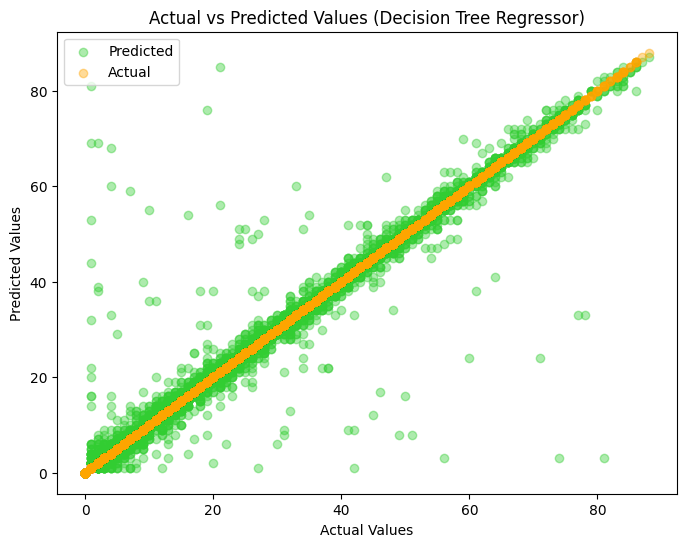

In [81]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_DTR, alpha=0.4, label='Predicted', color='limegreen')
plt.scatter(y_test, y_test, alpha=0.4, label='Actual', color='orange')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values (Decision Tree Regressor)')
plt.legend(loc='upper left')
plt.show()

# Using Random Forest Regressor from sklearn

In [66]:
from sklearn.ensemble import RandomForestRegressor

model_RFR = RandomForestRegressor()
model_RFR = model_RFR.fit(X_train, y_train)
y_pred_RFR = model_RFR.predict(X_test)

### Calculating the RMSE

In [67]:
rmse_RFR = root_mean_squared_error(y_test, y_pred_RFR)
print(f'Random Forest Regressor RMSE: {rmse_RFR}')

Random Forest Regressor RMSE: 3.1925036008188794


### Calculating the R^2 score

In [69]:
score_RFR = model_RFR.score(X_test, y_test)
print(f'Random Forest Regressor R^2 score: {score_RFR}')

Random Forest Regressor R^2 score: 0.9777465582158976


### Plotting actual vs predicted values

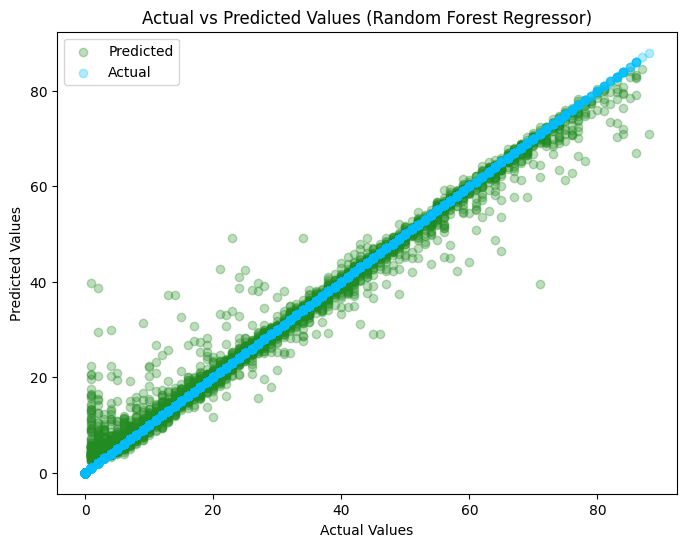

In [82]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_RFR, alpha=0.3, label='Predicted', color='forestgreen')
plt.scatter(y_test, y_test, alpha=0.3, label='Actual', color='deepskyblue')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values (Random Forest Regressor)')
plt.legend()
plt.show()